In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('data_training.csv',sep=';')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459965 entries, 0 to 459964
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DocsDate              459965 non-null  object
 1   ImportDuty_IDR        459965 non-null  int64 
 2   CIF                   459965 non-null  object
 3   Valuta_CIF            459965 non-null  object
 4   Using_Intermediaries  459965 non-null  int64 
 5   Using_TradeAgreement  459965 non-null  int64 
 6   COuntryOfOrigin       459962 non-null  object
 7   HSCODE                459965 non-null  int64 
 8   CustChannel           459965 non-null  object
dtypes: int64(4), object(5)
memory usage: 31.6+ MB


In [4]:
df_train['CustChannel'].unique()

array(['Green', 'Red', 'Yellow'], dtype=object)

In [5]:
df_train.head()

,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,09/10/2022,254458953,170458,USD,0,0,TH,8708,Green
1,02/05/2022,1719402722,1237513,USD,0,0,MY,4016,Green
2,02/04/2022,662630024,40640204,JPY,0,0,JP,7318,Green
3,08/05/2022,7443742,1159783,JPY,1,0,CN,8443,Green
4,02/08/2022,20795848,207958981,IDR,0,0,MX,8708,Green


In [6]:
df_train['CIF'] = df_train['CIF'].str.replace(',', '', regex=True)  
df_train['CIF'] = df_train['CIF'].astype('float').astype('int64')  


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459965 entries, 0 to 459964
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DocsDate              459965 non-null  object
 1   ImportDuty_IDR        459965 non-null  int64 
 2   CIF                   459965 non-null  int64 
 3   Valuta_CIF            459965 non-null  object
 4   Using_Intermediaries  459965 non-null  int64 
 5   Using_TradeAgreement  459965 non-null  int64 
 6   COuntryOfOrigin       459962 non-null  object
 7   HSCODE                459965 non-null  int64 
 8   CustChannel           459965 non-null  object
dtypes: int64(5), object(4)
memory usage: 31.6+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in df_train.columns:
        if df_train[i].dtypes == object:
            df_train[i] = labelencoder.fit_transform(df_train[i])

In [9]:
df_train.head()

,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,103,254458953,170458,19,0,0,110,8708,0
1,16,1719402722,1237513,19,0,0,78,4016,0
2,15,662630024,40640204,10,0,0,58,7318,0
3,86,7443742,1159783,10,1,0,21,8443,0
4,19,20795848,207958981,8,0,0,77,8708,0


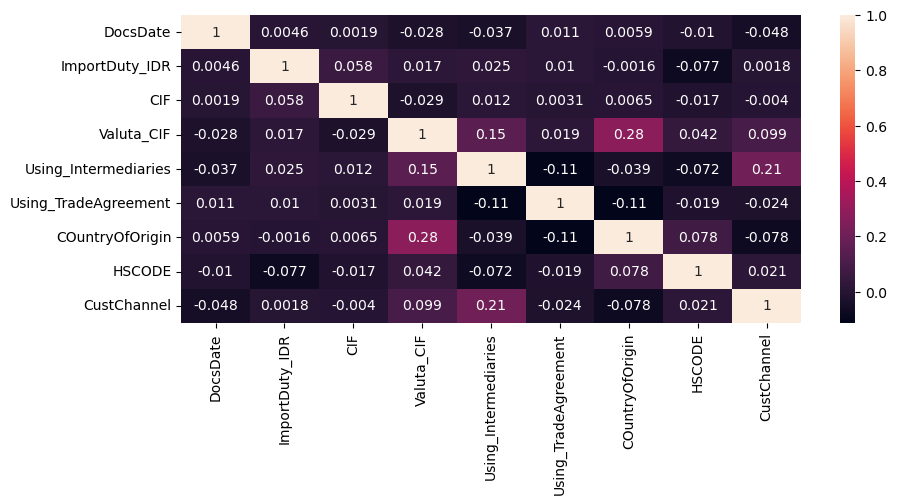

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [11]:
for i in df_train.columns:
    corrValue = df_train[i].corr(df_train["CustChannel"])
    print(f"{i} : {corrValue}")

DocsDate : -0.04815675446370563
ImportDuty_IDR : 0.0018064357992989219
CIF : -0.003996899127665947
Valuta_CIF : 0.09932660572766537
Using_Intermediaries : 0.20585985816555424
Using_TradeAgreement : -0.023682558482304484
COuntryOfOrigin : -0.07817594801674686
HSCODE : 0.02055911549059174
CustChannel : 1.0


In [12]:
y = df_train.CustChannel
x = df_train.drop(columns=['CustChannel','ImportDuty_IDR','CIF'])

In [13]:
x.head()

,DocsDate,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,103,19,0,0,110,8708
1,16,19,0,0,78,4016
2,15,10,0,0,58,7318
3,86,10,1,0,21,8443
4,19,8,0,0,77,8708


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x= pd.DataFrame(scaler.transform(x),
                              columns = x.columns)

In [15]:
x.head()

,DocsDate,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,0.376234,0.840033,-1.145881,-0.34143,1.501341,0.803551
1,-1.031300,0.840033,-1.145881,-0.34143,0.523350,-1.331880
2,-1.047479,-0.786385,-1.145881,-0.34143,-0.087895,0.170932
3,0.101198,-0.786385,0.872691,-0.34143,-1.218697,0.682944
4,-0.982765,-1.147811,-1.145881,-0.34143,0.492788,0.803551


In [16]:
RANDOM_STATE = 0
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
X_train, X_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, random_state = RANDOM_STATE)

In [17]:
from sklearn.model_selection import cross_val_score
Model = []
Accuracy = []
Precision = []
Recall = []
F1_Score = []


def input_scores(name, model, x, y,x_val, y_val):
    Model.append(name)
    model.fit(x,y)
    y_pred = model.predict(x_val)
    accuracy_scores = accuracy_score(y_val,y_pred)
    precision_scores = precision_score(y_val, y_pred, average='weighted')  # Sesuaikan dengan 'micro', 'macro', atau 'weighted' sesuai kebutuhan
    recall_scores = recall_score(y_val, y_pred, average='weighted')  # Sesuaikan dengan 'micro', 'macro', atau 'weighted' sesuai kebutuhan
    f1_scores = f1_score(y_val, y_pred, average='weighted')
    
    Accuracy.append(accuracy_scores.mean())
    Precision.append(precision_scores.mean())
    Recall.append(recall_scores.mean())
    F1_Score.append(f1_scores.mean())

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier)

names = ['K Neighbors Classification', 'Decision Tree Classification', 
         'Random Forest Classification', 'Gradient Boosting Classification',
         'Adaboost Classification']
models = [KNeighborsClassifier(), DecisionTreeClassifier(),
          RandomForestClassifier(), GradientBoostingClassifier(), 
          AdaBoostClassifier()]

In [19]:
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train,X_val,y_val)

In [20]:
evaluation = pd.DataFrame({'Model': Model,
                           'Accuracy': Accuracy,
                           'Precision':Precision,
                           'Recall': Recall,
                           'F1_Score': F1_Score})
print("FOLLOWING ARE THE VALIDATION SCORES: ")
evaluation

FOLLOWING ARE THE VALIDATION SCORES: 


,Model,Accuracy,Precision,Recall,F1_Score
0,K Neighbors Classification,0.952464,0.949277,0.952464,0.950297
1,Decision Tree Classification,0.959877,0.959061,0.959877,0.959432
2,Random Forest Classification,0.965193,0.963522,0.965193,0.964010
3,Gradient Boosting Classification,0.919668,0.908616,0.919668,0.890848
4,Adaboost Classification,0.912211,0.861136,0.912211,0.872281


In [21]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

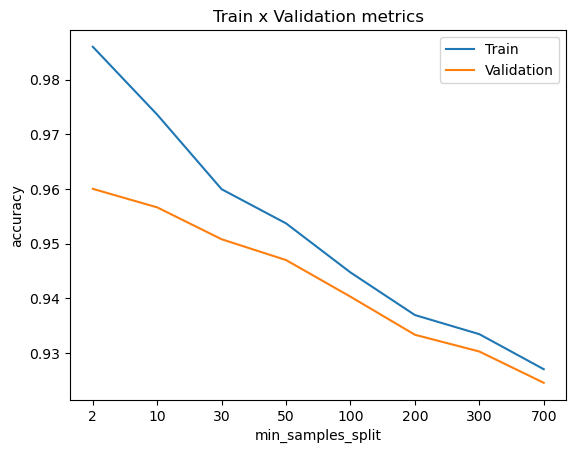

In [22]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

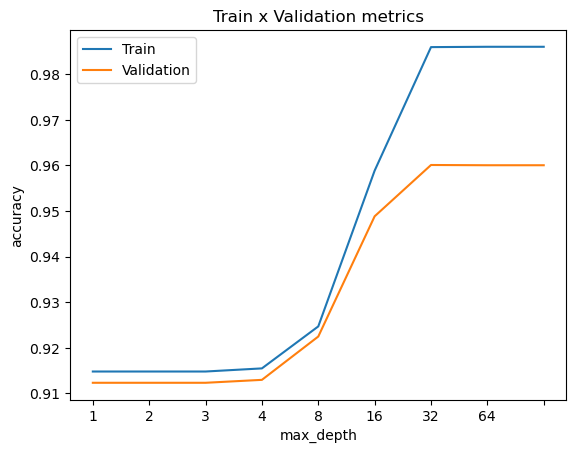

In [23]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [32]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500,1000,1500]

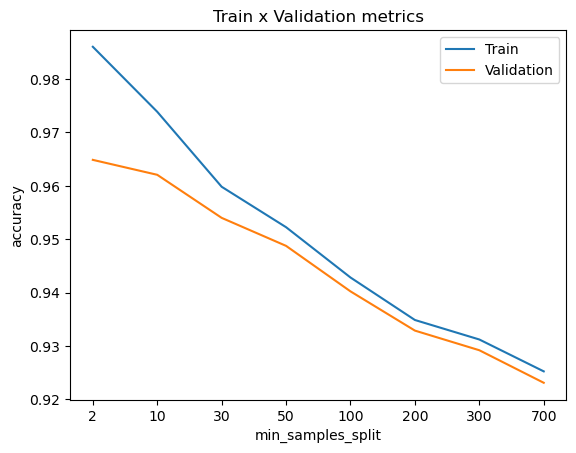

In [25]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

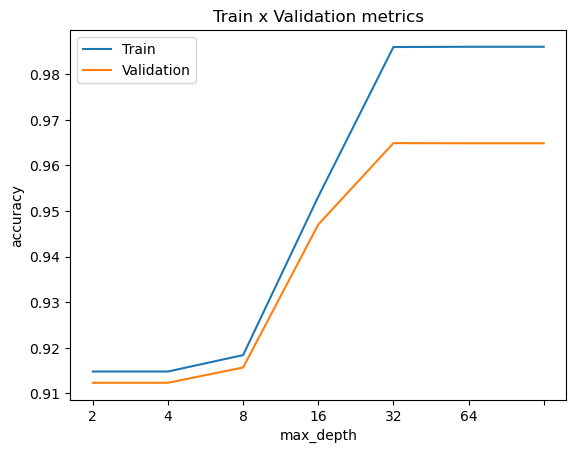

In [26]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

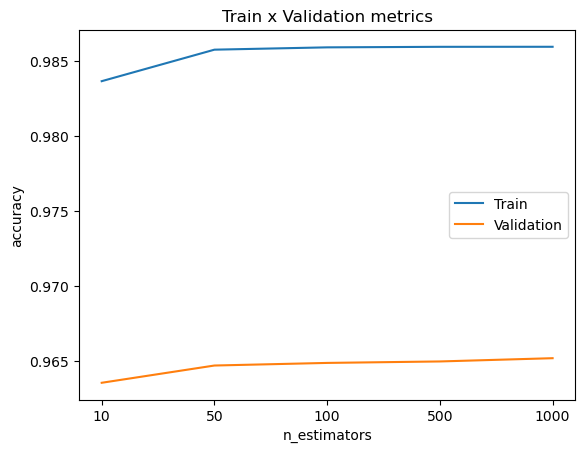

In [35]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = 32,n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [36]:
from sklearn.ensemble import VotingClassifier



# Create individual models
rf_model = RandomForestClassifier(max_depth = 32,n_estimators=1500, random_state=RANDOM_STATE)
dt_model = DecisionTreeClassifier(max_depth = 32, random_state=RANDOM_STATE)



# Train individual models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)


# Make predictions with individual models
rf_pred = rf_model.predict(X_val)
dt_pred = dt_model.predict(X_val)


# Evaluate individual models
print('RandomForestClassifier Score')
acc=accuracy_score(y_val,rf_pred)
cm=confusion_matrix(y_val,rf_pred)
cr=classification_report(y_val,rf_pred)
tr=rf_model.score(X_train,y_train)
te=rf_model.score(X_val,y_val)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')

print('DecisionTreeClassifier Score')
acc=accuracy_score(y_val,dt_pred)
cm=confusion_matrix(y_val,dt_pred)
cr=classification_report(y_val,dt_pred)
tr=dt_model.score(X_train,y_train)
te=dt_model.score(X_val,y_val)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')

ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf_model), 
    ('Decision Tree', dt_model)
    ])
ensemble_model.fit(X_train, y_train)

ensemble_pred = ensemble_model.predict(X_val)

print('Ensemble Score')
acc=accuracy_score(y_val,ensemble_pred)
cm=confusion_matrix(y_val,ensemble_pred)
cr=classification_report(y_val,ensemble_pred)
tr=ensemble_model.score(X_train,y_train)
te=ensemble_model.score(X_val,y_val)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: 
      {tr}\nTesting Accuracy: {te}')


RandomForestClassifier Score
Accuracy: 0.9650516887154458
[[82994   473   460]
 [  993  2934   159]
 [ 1011   119  2850]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     83927
           1       0.83      0.72      0.77      4086
           2       0.82      0.72      0.77      3980

    accuracy                           0.97     91993
   macro avg       0.88      0.81      0.84     91993
weighted avg       0.96      0.97      0.96     91993

Training Accuracy: 0.9859581707303816
Testing Accuracy: 0.9650516887154458
DecisionTreeClassifier Score
Accuracy: 0.9600730490363397
[[82438   773   716]
 [  937  2975   174]
 [  936   137  2907]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     83927
           1       0.77      0.73      0.75      4086
           2       0.77      0.73      0.75      3980

    accuracy                           0.96     91993
   macro avg       0.84     

In [37]:
ensemble_model.fit(x, y)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=32,
                                                     n_estimators=1500,
                                                     random_state=0)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=32,
                                                     random_state=0))])

In [38]:
df_test = pd.read_csv('data_testing.csv',sep=';')

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    39996 non-null  object
 1   DocsDate              39996 non-null  object
 2   ImportDuty_IDR        39996 non-null  int64 
 3   CIF                   39996 non-null  int64 
 4   Valuta_CIF            39996 non-null  object
 5   Using_Intermediaries  39996 non-null  int64 
 6   Using_TradeAgreement  39996 non-null  int64 
 7   COuntryOfOrigin       39996 non-null  object
 8   HSCODE                39996 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.7+ MB


In [40]:
df_test.head()

,ID,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,C1,02/01/2022,28212800050,41584240,USD,0,0,NZ,206
1,C2,12/11/2022,259418090,13014510,JPY,0,0,JP,4016
2,C3,16/11/2022,2597872060,1413620,USD,0,0,TH,7318
3,C4,03/09/2022,11550943500,15789680,USD,1,1,CN,8708
4,C5,04/04/2022,1871500400,95652240,JPY,1,0,JP,3926


In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in df_test.columns:
    if i != 'ID':
        if df_test[i].dtypes == object:
            df_test[i] = labelencoder.fit_transform(df_test[i])

In [42]:
df_test.head()

,ID,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,C1,12,28212800050,41584240,18,0,0,60,206
1,C2,132,259418090,13014510,10,0,0,43,4016
2,C3,170,2597872060,1413620,18,0,0,79,7318
3,C4,30,11550943500,15789680,18,1,1,12,8708
4,C5,37,1871500400,95652240,10,1,0,43,3926


In [43]:
x_test = df_test.copy().drop(columns=['ID','ImportDuty_IDR','CIF'])

In [45]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   DocsDate              39996 non-null  int32
 1   Valuta_CIF            39996 non-null  int32
 2   Using_Intermediaries  39996 non-null  int64
 3   Using_TradeAgreement  39996 non-null  int64
 4   COuntryOfOrigin       39996 non-null  int32
 5   HSCODE                39996 non-null  int64
dtypes: int32(3), int64(3)
memory usage: 1.4 MB


In [46]:
x_test= pd.DataFrame(scaler.transform(x_test),
                              columns = x_test.columns)

In [47]:
x_test.head()

,DocsDate,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,-1.096015,0.659320,-1.145881,-0.341430,-0.026770,-3.065893
1,0.845412,-0.786385,-1.145881,-0.341430,-0.546328,-1.331880
2,1.460196,0.659320,-1.145881,-0.341430,0.553912,0.170932
3,-0.804801,0.659320,0.872691,2.928859,-1.493757,0.803551
4,-0.691551,-0.786385,0.872691,-0.341430,-0.546328,-1.372841


In [48]:
predictions = ensemble_model.predict(x_test)

In [49]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
mapping = {0: 'Green', 1: 'Red', 2: 'Yellow'}

In [51]:
import numpy as np
pred_mapped = np.vectorize(mapping.get)(predictions)

In [52]:
pred_mapped

array(['Green', 'Green', 'Green', ..., 'Green', 'Green', 'Green'],
      dtype='<U6')

In [53]:
output = pd.DataFrame({'ID':df_test.ID,'CustChannel':pred_mapped})
output.to_csv('submission_9(04-11-2023).csv', index=False)

In [54]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39996 non-null  object
 1   CustChannel  39996 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB
